In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Hydrophone/Branched/Gasket Leak/BR_GL_Transient_NS_H1.raw
/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Hydrophone/Branched/Gasket Leak/BR_GL_0.47 LPS_H2.raw
/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Hydrophone/Branched/Gasket Leak/BR_GL_0.18 LPS_H1.raw
/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Hydrophone/Branched/Gasket Leak/BR_GL_0.47 LPS_H1.raw
/kaggle/input/leak-detection/Dataset for Leak Detection and Localization

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from keras.models import load_model
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN, GRU
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import os

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
# Path to the directory containing CSV files
csv_directory = '/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Accelerometer/Branched/Circumferential Crack/'

# List all files in the directory
csv_files = [file for file in os.listdir(csv_directory) if file.endswith('.csv')]

dataframes = []

# Loop through the CSV files and read them into DataFrames
for file in csv_files:
    file_path = os.path.join(csv_directory, file)
    df = pd.read_csv(file_path)
    dataframes.append(df['Value'])

# Concatenate all DataFrames into a single DataFrame
df = pd.concat(dataframes, axis=1, ignore_index=True)

# Add leaktype
df["LeakType"] = "Circumferential Crack"

# Rename columns
df = df.rename(columns={0: "Value1", 1: "Value2", 2: "Value3", 3: "Value4", 4: "Value5", 5: "Value6", 6:"Value7", 7:"Value8"})

In [4]:
# Path to the directory containing CSV files
csv_directory1 = '/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Accelerometer/Branched/Gasket Leak'

# List all files in the directory
csv_files = [file for file in os.listdir(csv_directory1) if file.endswith('.csv')]

dataframes = []

# Loop through the CSV files and read them into DataFrames
for file in csv_files:
    file_path = os.path.join(csv_directory1, file)
    df1 = pd.read_csv(file_path)
    dataframes.append(df1['Value'])

# Concatenate all DataFrames into a single DataFrame
df1 = pd.concat(dataframes, axis=1, ignore_index=True)

# Add leaktype
df1["LeakType"] = "Gasket Leak"

# Rename columns
df1 = df1.rename(columns={0: "Value1", 1: "Value2", 2: "Value3", 3: "Value4", 4: "Value5", 5: "Value6", 6:"Value7", 7:"Value8"})

In [5]:
# Path to the directory containing CSV files
csv_directory2 = '/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Accelerometer/Branched/Longitudinal Crack'

# List all files in the directory
csv_files = [file for file in os.listdir(csv_directory2) if file.endswith('.csv')]

dataframes = []

# Loop through the CSV files and read them into DataFrames
for file in csv_files:
    file_path = os.path.join(csv_directory2, file)
    df2 = pd.read_csv(file_path)
    dataframes.append(df2['Value'])

# Concatenate all DataFrames into a single DataFrame
df2 = pd.concat(dataframes, axis=1, ignore_index=True)

# Add leaktype
df2["LeakType"] = "Longitudinal Crack"

# Rename columns
df2 = df2.rename(columns={0: "Value1", 1: "Value2", 2: "Value3", 3: "Value4", 4: "Value5", 5: "Value6", 6:"Value7", 7:"Value8"})

In [6]:
# Path to the directory containing CSV files
csv_directory3 = "/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Accelerometer/Branched/NonLeak"

# List all files in the directory
csv_files = [file for file in os.listdir(csv_directory3) if file.endswith('.csv')]

dataframes = []

# Loop through the CSV files and read them into DataFrames
for file in csv_files:
    file_path = os.path.join(csv_directory3, file)
    df3 = pd.read_csv(file_path)
    dataframes.append(df3['Value'])

# Concatenate all DataFrames into a single DataFrame
df3 = pd.concat(dataframes, axis=1, ignore_index=True)

# Add leaktype
df3["LeakType"] = "NonLeak"

# Rename columns
df3 = df3.rename(columns={0: "Value1", 1: "Value2", 2: "Value3", 3: "Value4", 4: "Value5", 5: "Value6", 6:"Value7", 7:"Value8"})

In [7]:
# Path to the directory containing CSV files
csv_directory4 = "/kaggle/input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Accelerometer/Branched/Orifice Leak"

# List all files in the directory
csv_files = [file for file in os.listdir(csv_directory4) if file.endswith('.csv')]

dataframes = []

# Loop through the CSV files and read them into DataFrames
for file in csv_files:
    file_path = os.path.join(csv_directory4, file)
    df4 = pd.read_csv(file_path)
    dataframes.append(df4['Value'])

# Concatenate all DataFrames into a single DataFrame
df4 = pd.concat(dataframes, axis=1, ignore_index=True)

# Add leaktype
df4["LeakType"] = "Orifice Leak"

# Rename columns
df4 = df4.rename(columns={0: "Value1", 1: "Value2", 2: "Value3", 3: "Value4", 4: "Value5", 5: "Value6", 6:"Value7", 7:"Value8"})

In [8]:
data = pd.concat([df, df1, df2, df3, df4], axis=0)
data = data.sample(frac = 1)
data.head(100)

Value1    Value2    Value3    Value4    Value5    Value6    Value7  \
839336 -0.000111 -0.000917 -0.000118  0.002845  0.004884  0.002832 -0.002361   
421378  0.001037  0.000691  0.031464 -0.011287 -0.005831 -0.000552 -0.001259   
761892  0.000354 -0.001816  0.007209 -0.000060  0.000002 -0.003348 -0.000916   
356667  0.001779 -0.000995  0.004525  0.015435  0.002431  0.003227  0.000422   
181593  0.005902  0.003023  0.008096  0.009430  0.000087  0.003506 -0.000171   
...          ...       ...       ...       ...       ...       ...       ...   
728389 -0.008095 -0.000473 -0.003323 -0.000464  0.000094  0.001775 -0.000753   
640171 -0.001113  0.003125  0.001930 -0.004078 -0.000580  0.003726  0.000383   
760424  0.001055 -0.001461 -0.011795  0.000706  0.000600 -0.014243 -0.001892   
274605 -0.001640  0.012483  0.000531 -0.000682 -0.010246 -0.001624 -0.000509   
250729 -0.002476  0.000578  0.015253 -0.001707  0.001770  0.000927  0.001289   

          Value8               LeakType  
839336 -0.001278                NonLeak  
421378 -0.000857                NonLeak  
761892 -0.000598     Longitudinal Crack  
356667 -0.003508           Orifice Leak  
181593  0.003347           Orifice Leak  
...          ...                    ...  
728389  0.001110            Gasket Leak  
640171 -0.000874           Orifice Leak  
760424 -0.002417     Longitudinal Crack  
274605  0.001194  Circumferential Crack  
250729  0.000400                NonLeak  

[100 rows x 9 columns]

In [9]:
data.describe()

Value1        Value2        Value3        Value4        Value5  \
count  4.653615e+06  4.659736e+06  4.677933e+06  4.623352e+06  4.748113e+06   
mean   1.811341e-04  4.096639e-05 -6.912145e-05 -8.929817e-05  1.638551e-04   
std    7.103367e-03  6.321551e-03  8.343090e-03  8.854348e-03  7.749796e-03   
min   -6.204647e-02 -6.794844e-02 -2.162147e-01 -6.239063e-02 -1.362637e-01   
25%   -2.238196e-03 -1.430690e-03 -2.941432e-03 -2.234641e-03 -1.574385e-03   
50%    1.458110e-04  1.730640e-04  1.087310e-04 -5.260000e-06  1.840140e-04   
75%    2.555294e-03  1.811773e-03  2.644753e-03  1.768524e-03  1.953766e-03   
max    6.181164e-02  6.912008e-02  2.381822e-01  6.656344e-02  1.405256e-01   

             Value6        Value7        Value8  
count  4.635541e+06  4.638160e+06  4.545124e+06  
mean   1.758802e-04 -1.655129e-04 -9.601014e-05  
std    8.509758e-03  2.345402e-03  3.242536e-03  
min   -1.743199e-01 -1.346033e-02 -3.132796e-02  
25%   -1.728099e-03 -1.408177e-03 -1.747650e-03  
50%    1.742490e-04 -1.047940e-04 -1.563370e-04  
75%    2.057638e-03  1.158304e-03  1.450972e-03  
max    1.474576e-01  2.967278e-02  2.619016e-02

In [10]:
data.isna()
data = data.dropna()
print(data.describe())

             Value1        Value2        Value3        Value4        Value5  \
count  4.502877e+06  4.502877e+06  4.502877e+06  4.502877e+06  4.502877e+06   
mean   1.779281e-04  3.813467e-05 -7.303240e-05 -9.070966e-05  1.648013e-04   
std    7.130862e-03  6.413970e-03  8.465142e-03  8.967947e-03  7.953716e-03   
min   -6.204647e-02 -6.794844e-02 -2.162147e-01 -6.239063e-02 -1.362637e-01   
25%   -2.274041e-03 -1.439951e-03 -3.056365e-03 -2.319954e-03 -1.755352e-03   
50%    1.404790e-04  1.736560e-04  1.090800e-04 -1.060000e-05  1.908370e-04   
75%    2.580177e-03  1.825306e-03  2.726912e-03  1.825991e-03  2.135401e-03   
max    6.181164e-02  6.912008e-02  2.381822e-01  6.656344e-02  1.405256e-01   

             Value6        Value7        Value8  
count  4.502877e+06  4.502877e+06  4.502877e+06  
mean   1.745168e-04 -1.700673e-04 -1.052901e-04  
std    8.470820e-03  2.360629e-03  3.248236e-03  
min   -1.743199e-01 -1.346033e-02 -3.132796e-02  
25%   -1.735801e-03 -1.416472e-03 -1.7

In [11]:
from pandas_profiling import ProfileReport
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
data.drop_duplicates(inplace=True)
data.describe()

Value1        Value2        Value3        Value4        Value5  \
count  4.502877e+06  4.502877e+06  4.502877e+06  4.502877e+06  4.502877e+06   
mean   1.779281e-04  3.813467e-05 -7.303240e-05 -9.070966e-05  1.648013e-04   
std    7.130862e-03  6.413970e-03  8.465142e-03  8.967947e-03  7.953716e-03   
min   -6.204647e-02 -6.794844e-02 -2.162147e-01 -6.239063e-02 -1.362637e-01   
25%   -2.274041e-03 -1.439951e-03 -3.056365e-03 -2.319954e-03 -1.755352e-03   
50%    1.404790e-04  1.736560e-04  1.090800e-04 -1.060000e-05  1.908370e-04   
75%    2.580177e-03  1.825306e-03  2.726912e-03  1.825991e-03  2.135401e-03   
max    6.181164e-02  6.912008e-02  2.381822e-01  6.656344e-02  1.405256e-01   

             Value6        Value7        Value8  
count  4.502877e+06  4.502877e+06  4.502877e+06  
mean   1.745168e-04 -1.700673e-04 -1.052901e-04  
std    8.470820e-03  2.360629e-03  3.248236e-03  
min   -1.743199e-01 -1.346033e-02 -3.132796e-02  
25%   -1.735801e-03 -1.416472e-03 -1.760091e-03  
50%    1.730640e-04 -1.087540e-04 -1.664080e-04  
75%    2.057638e-03  1.157915e-03  1.442086e-03  
max    1.474576e-01  2.967278e-02  2.619016e-02

In [13]:
from scipy.stats import zscore

# Calculate z-scores for numerical columns
z_scores = data.select_dtypes(include=['float64']).apply(zscore)

# Define a threshold for identifying outliers (adjust as needed)
threshold = 3

# Identify and remove outliers
data_no_outliers = data[(z_scores.abs() < threshold).all(axis=1)]

# Compare shapes to see how many outliers were removed
print("Original shape:", data.shape)
print("Data without outliers shape:", data_no_outliers.shape)

# Check for missing values after removing outliers
missing_values_after = data_no_outliers.isna().sum()
print("Missing values after removing outliers:")
print(missing_values_after)

Original shape: (4502877, 9)
Data without outliers shape: (3753354, 9)
Missing values after removing outliers:
Value1      0
Value2      0
Value3      0
Value4      0
Value5      0
Value6      0
Value7      0
Value8      0
LeakType    0
dtype: int64


In [14]:
label_encoder = LabelEncoder()
data['category_label_encoded'] = label_encoder.fit_transform(data['LeakType'])
data.head(100)

Value1    Value2    Value3    Value4    Value5    Value6    Value7  \
839336 -0.000111 -0.000917 -0.000118  0.002845  0.004884  0.002832 -0.002361   
421378  0.001037  0.000691  0.031464 -0.011287 -0.005831 -0.000552 -0.001259   
761892  0.000354 -0.001816  0.007209 -0.000060  0.000002 -0.003348 -0.000916   
356667  0.001779 -0.000995  0.004525  0.015435  0.002431  0.003227  0.000422   
181593  0.005902  0.003023  0.008096  0.009430  0.000087  0.003506 -0.000171   
...          ...       ...       ...       ...       ...       ...       ...   
274605 -0.001640  0.012483  0.000531 -0.000682 -0.010246 -0.001624 -0.000509   
250729 -0.002476  0.000578  0.015253 -0.001707  0.001770  0.000927  0.001289   
602296 -0.004058 -0.002348  0.002699  0.000715 -0.033399  0.000654 -0.000677   
551836  0.002360  0.005192  0.005149 -0.014342  0.002026 -0.000563 -0.000953   
721938 -0.000499  0.001316  0.000804 -0.005006 -0.001126  0.000259  0.005907   

          Value8               LeakType  category_label_encoded  
839336 -0.001278                NonLeak                       3  
421378 -0.000857                NonLeak                       3  
761892 -0.000598     Longitudinal Crack                       2  
356667 -0.003508           Orifice Leak                       4  
181593  0.003347           Orifice Leak                       4  
...          ...                    ...                     ...  
274605  0.001194  Circumferential Crack                       0  
250729  0.000400                NonLeak                       3  
602296  0.001213  Circumferential Crack                       0  
551836 -0.000701           Orifice Leak                       4  
721938 -0.002608                NonLeak                       3  

[100 rows x 10 columns]

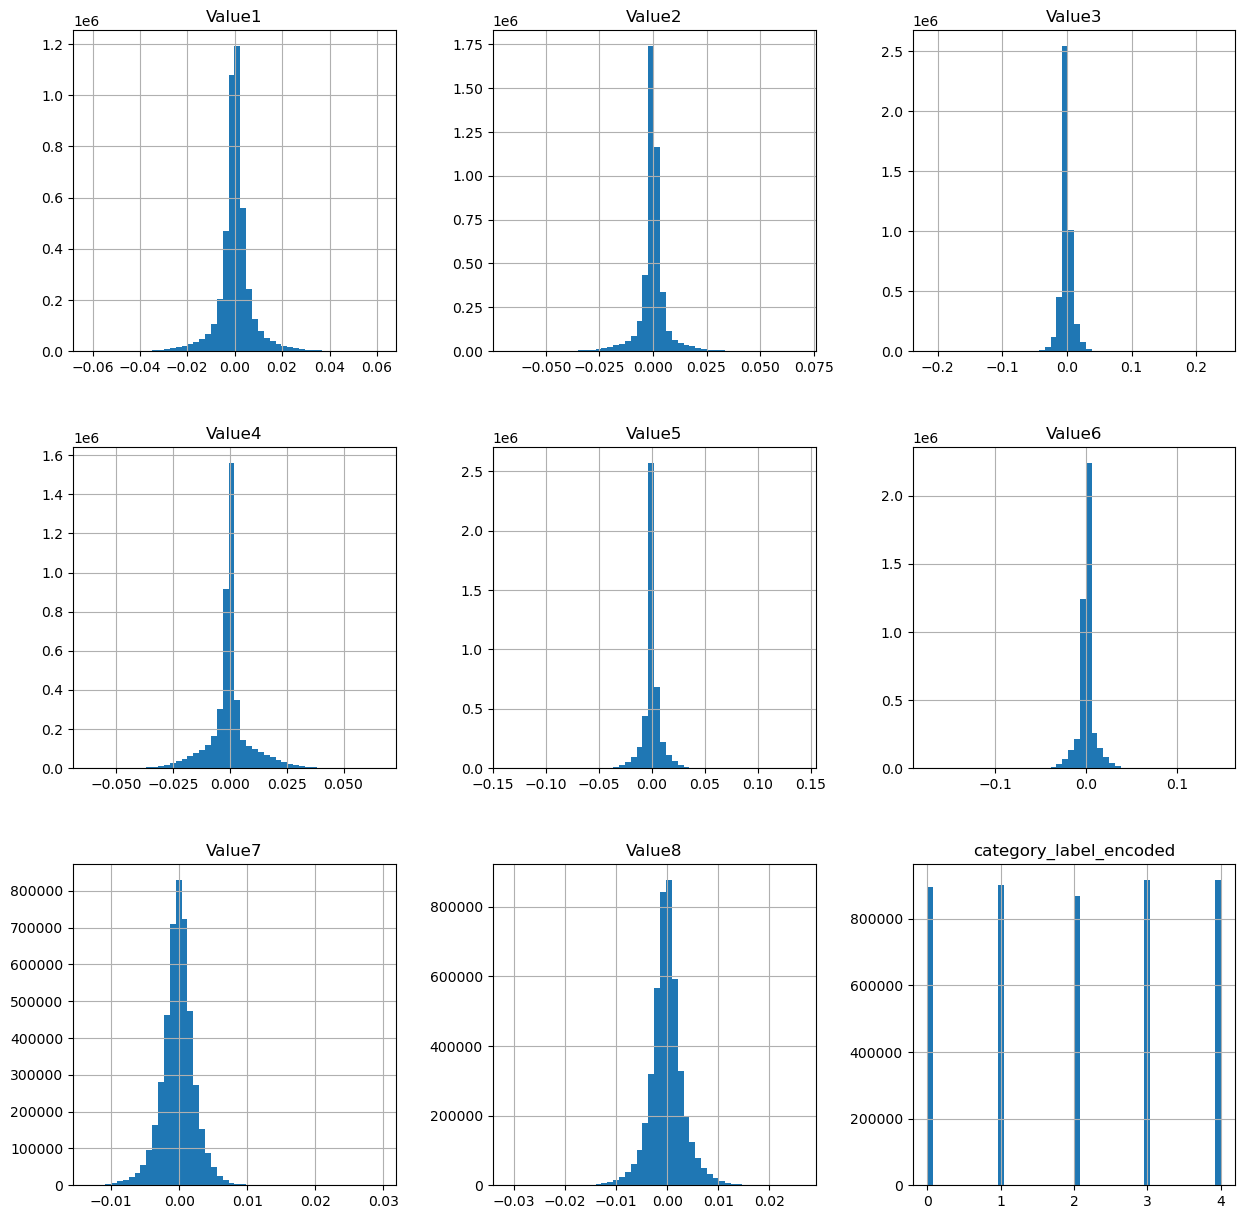

In [15]:
data.hist(bins=50, figsize=(15,15))
plt.show()

In [16]:
# Calculate summary statistics
summary_stats = data.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])
skewness = data.skew()
kurtosis = data.kurtosis()
correlation_matrix = data.corr()

# Count missing values
missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100

# Print or analyze the calculated statistics as needed
print(summary_stats)
print(skewness)
print(kurtosis)
print(correlation_matrix)
print(missing_values)
print(missing_percent)

             Value1        Value2        Value3        Value4        Value5  \
count  4.502877e+06  4.502877e+06  4.502877e+06  4.502877e+06  4.502877e+06   
mean   1.779281e-04  3.813467e-05 -7.303240e-05 -9.070966e-05  1.648013e-04   
std    7.130862e-03  6.413970e-03  8.465142e-03  8.967947e-03  7.953716e-03   
min   -6.204647e-02 -6.794844e-02 -2.162147e-01 -6.239063e-02 -1.362637e-01   
10%   -6.124834e-03 -5.140594e-03 -9.210846e-03 -9.528708e-03 -7.341911e-03   
25%   -2.274041e-03 -1.439951e-03 -3.056365e-03 -2.319954e-03 -1.755352e-03   
50%    1.404790e-04  1.736560e-04  1.090800e-04 -1.060000e-05  1.908370e-04   
75%    2.580177e-03  1.825306e-03  2.726912e-03  1.825991e-03  2.135401e-03   
90%    6.623114e-03  4.831476e-03  8.766891e-03  9.676264e-03  7.598807e-03   
max    6.181164e-02  6.912008e-02  2.381822e-01  6.656344e-02  1.405256e-01   

             Value6        Value7        Value8  category_label_encoded  
count  4.502877e+06  4.502877e+06  4.502877e+06         

<Figure size 1200x800 with 0 Axes>

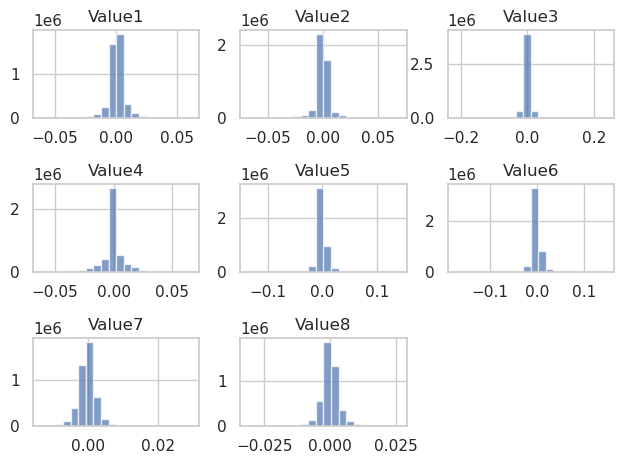

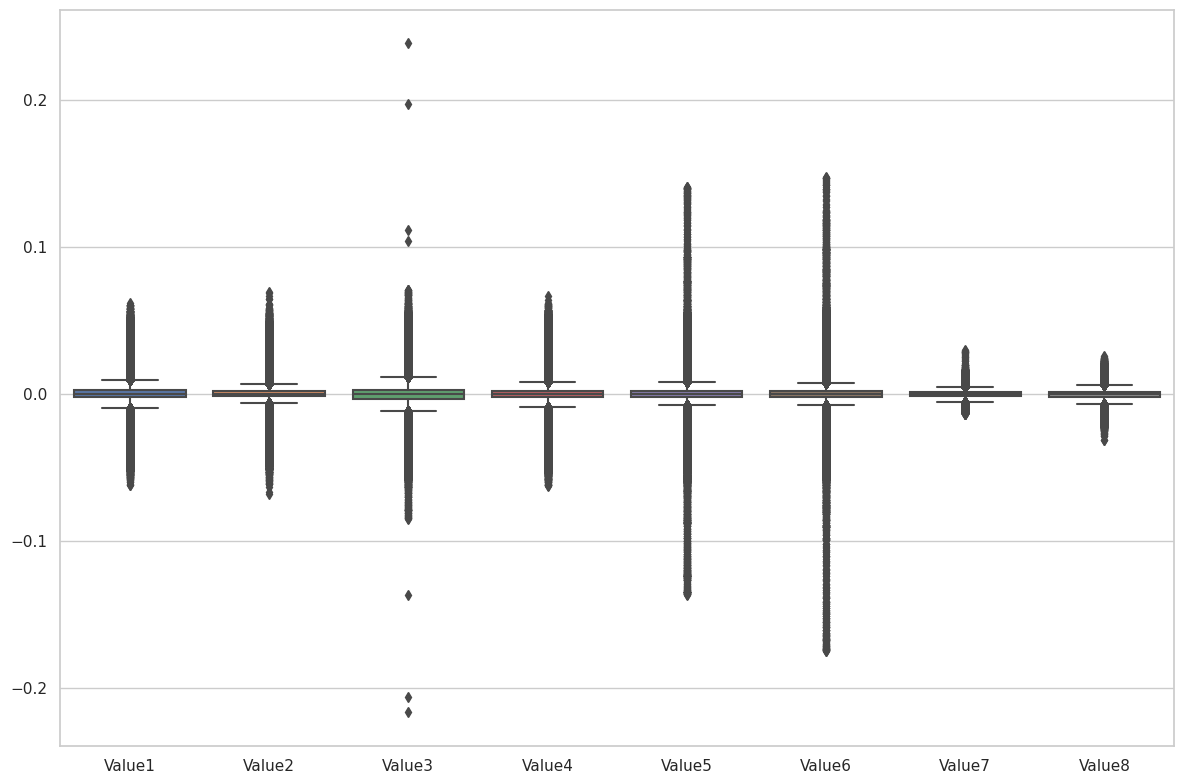

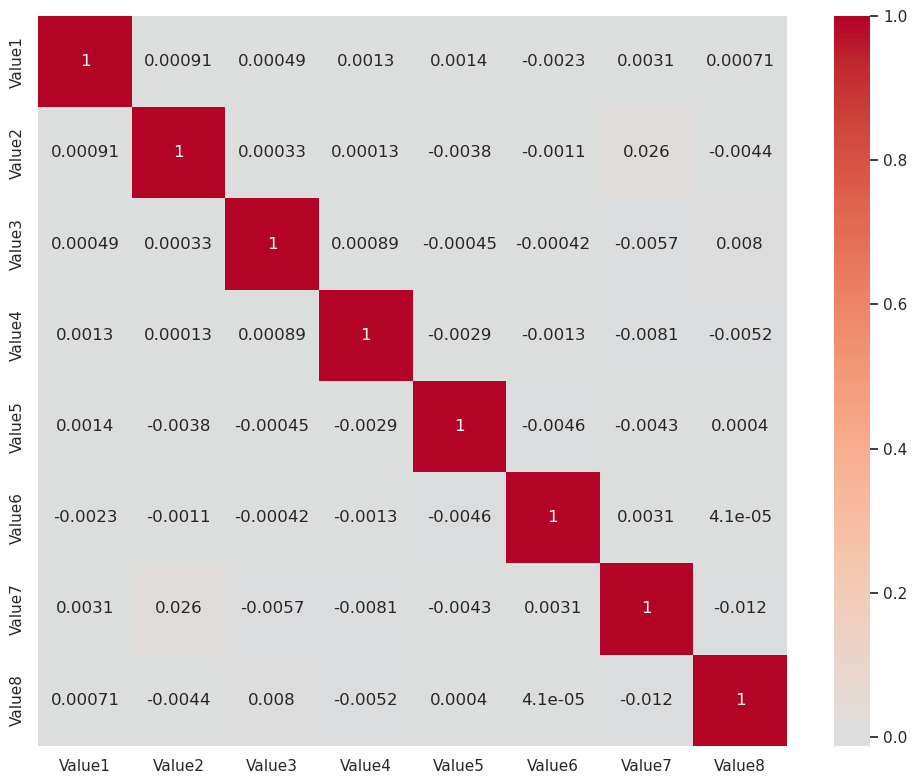

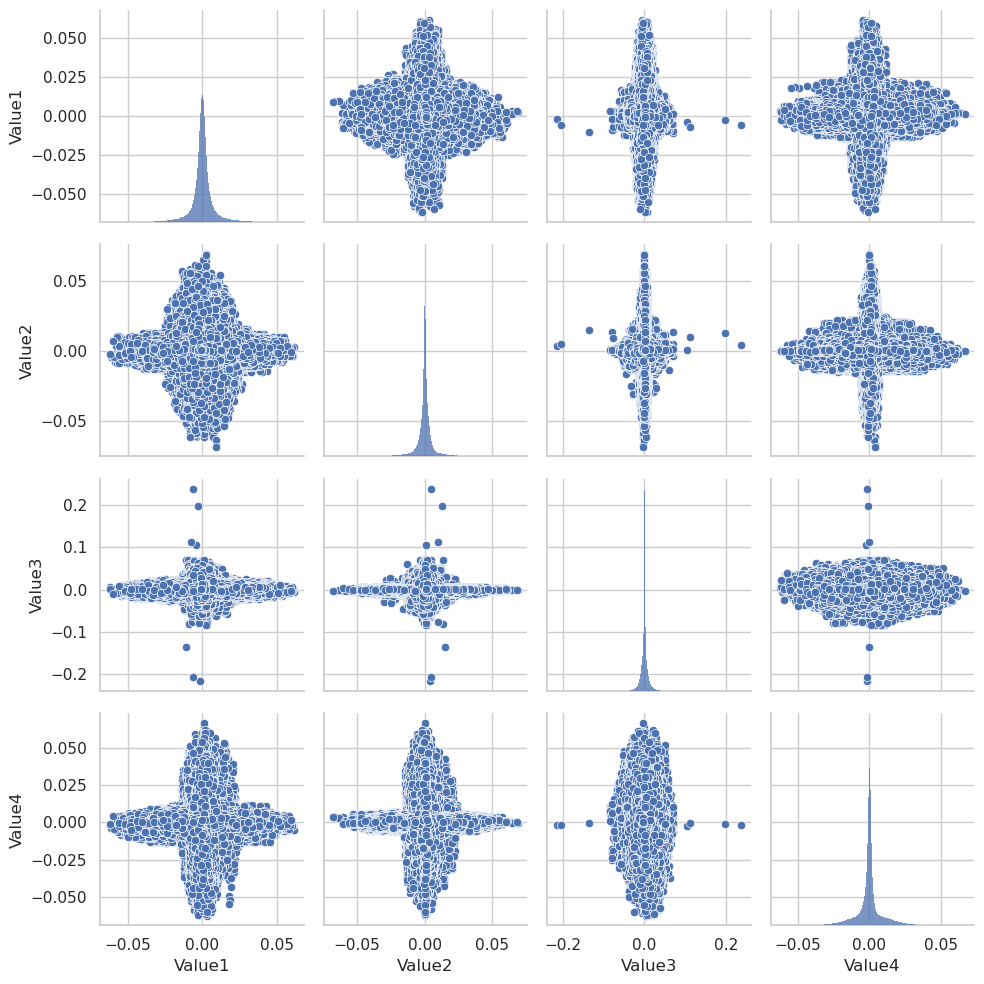

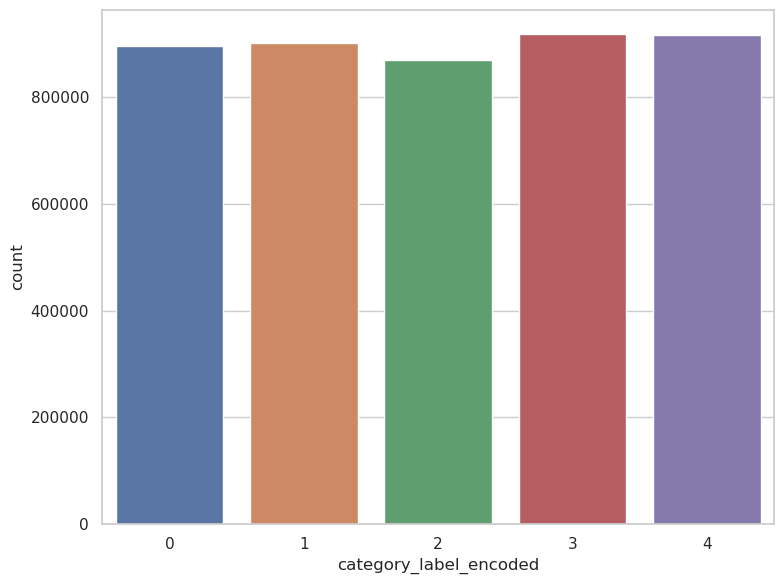

In [17]:
# Set style for Seaborn plots
sns.set(style="whitegrid")

# Histograms
numerical_columns = ['Value1', 'Value2', 'Value3', 'Value4', 'Value5', 'Value6', 'Value7', 'Value8']
plt.figure(figsize=(12, 8))
data[numerical_columns].hist(bins=20, alpha=0.7)
plt.tight_layout()
plt.show()

# Box Plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[numerical_columns])
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm', center=0)
plt.tight_layout()
plt.show()

# Pair Plots (select a subset if there are too many variables)
sns.pairplot(data[numerical_columns[:4]])
plt.tight_layout()
plt.show()

# Bar Plots (for categorical variables)
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='category_label_encoded')
plt.tight_layout()
plt.show()

# # Scatter Plots (for pairs of numerical variables)
# sns.scatterplot(data=data, x='Value1', y='Value2', hue='category_label_encoded', alpha=0.5)
# plt.tight_layout()
# plt.show()

# # Violin Plots
# plt.figure(figsize=(12, 8))
# sns.violinplot(data=data[numerical_columns])
# plt.tight_layout()
# plt.show()

In [18]:
# Assuming you have already preprocessed your data and split it into X and y
X = data.drop(['LeakType', 'category_label_encoded'], axis=1)  # Features
y = data['category_label_encoded']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Standardize features (Z-score scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

DNN

In [20]:
# # Build DNN model
# model = Sequential()
# model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(5, activation='softmax'))  # Output layer, 5 for the number of unique categories

# # Compile model
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Train model
# history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=16, validation_data=(X_test_scaled, y_test))

# # Evaluate model
# test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
# print(f'Test Loss: {test_loss:.4f}')
# print(f'Test Accuracy: {test_accuracy:.4f}')

In [21]:
# from sklearn.metrics import confusion_matrix

# # Generate predictions
# y_pred = np.argmax(model.predict(X_test_scaled),axis=1)

# # Build confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(conf_matrix)

RNN

In [22]:
# # Reshape the data for RNN input (sequence length, num features)
sequence_length = X_train_scaled.shape[1]
X_train_reshaped = X_train_scaled.reshape(1, sequence_length, -1)
X_test_reshaped = X_test_scaled.reshape(1, sequence_length, -1)

# # Build an RNN
# model = Sequential([
#     SimpleRNN(64, activation='relu', input_shape=(sequence_length, 1)),
#     Dense(len(np.unique(y)), activation='softmax')
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(X_train_scaled, y_train, epochs=20, batch_size=16, validation_split=0.2)

# # Evaluate the model on the test data
# y_pred = model.predict(X_test_scaled)
# y_pred_classes = np.argmax(y_pred, axis=1)
# accuracy = accuracy_score(y_test, y_pred_classes)
# print("Test Accuracy:", accuracy)

In [23]:
# # Create a confusion matrix
# confusion_mat = confusion_matrix(y_test, y_pred_classes)
# print("Confusion Matrix:")
# print(confusion_mat)

LSTM

In [24]:
# Build an LSTM model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(sequence_length, 1)),
    Dense(len(np.unique(y)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=20, batch_size=16, validation_split=0.2)

# Evaluate the model on the test data
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)

Epoch 1/20
180115/180115 [==============================] - 1207s 7ms/step - loss: 0.3003 - accuracy: 0.8752 - val_loss: 0.2797 - val_accuracy: 0.8829
Epoch 2/20
180115/180115 [==============================] - 1208s 7ms/step - loss: 0.2768 - accuracy: 0.8847 - val_loss: 0.2717 - val_accuracy: 0.8870
Epoch 3/20
180115/180115 [==============================] - 1206s 7ms/step - loss: 0.2752 - accuracy: 0.8858 - val_loss: 0.2739 - val_accuracy: 0.8861
Epoch 4/20
180115/180115 [==============================] - 1232s 7ms/step - loss: 0.2777 - accuracy: 0.8863 - val_loss: 0.2730 - val_accuracy: 0.8863
Epoch 5/20
180115/180115 [==============================] - 1200s 7ms/step - loss: 0.3834 - accuracy: 0.8862 - val_loss: 0.2716 - val_accuracy: 0.8868
Epoch 6/20
180115/180115 [==============================] - 1184s 7ms/step - loss: 0.6593 - accuracy: 0.8866 - val_loss: 0.2826 - val_accuracy: 0.8835
Epoch 7/20
180115/180115 [==============================] - 1213s 7ms/step - loss: 0.3547 - ac

NameError: name 'accuracy_score' is not defined

In [26]:
from sklearn.metrics import accuracy_score
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)

# Create a confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.8730423639981523
Confusion Matrix:
[[168274   5110   3122    859   1381]
 [  6999 153734   9115   2992   7771]
 [  3648   3772 163963   1780   1569]
 [  2574   2311   5580 148492  24135]
 [  2941   4483   3185  21008 151778]]


GRU

In [ ]:
# # Build a GRU model
# model = Sequential([
#     GRU(64, activation='relu', input_shape=(sequence_length, 1)),
#     Dense(len(np.unique(y)), activation='softmax')
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# # Evaluate the model on the test data
# y_pred = model.predict(X_test_scaled)
# y_pred_classes = np.argmax(y_pred, axis=1)

# # Calculate and print accuracy
# accuracy = accuracy_score(y_test, y_pred_classes)
# print("Accuracy:", accuracy)

In [ ]:
# # Create a confusion matrix
# confusion_mat = confusion_matrix(y_test, y_pred_classes)
# print("Confusion Matrix:")
# print(confusion_mat)

In [ ]:
# # Reshape input data
# X_train = X_train.to_numpy().reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test = X_test.to_numpy().reshape((X_test.shape[0], X_test.shape[1], 1))

# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense


# model = Sequential()
# model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(LSTM(units=64, return_sequences=True))
# model.add(LSTM(units=64, return_sequences=True))
# model.add(Dense(units=1))

# model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# model.fit(X_train, y_train, epochs=20, batch_size=64, verbose=2)
# model.summary()

In [ ]:
# y_pred = model.predict(X_test)

# loss = model.evaluate(X_test, y_test)
# print("Test Loss:", loss)

# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error: {mse}')